Coefficients: [-0.00648221  0.62748842  0.03976434  0.54719304 -0.22344622 -0.05082764
  0.24081694  0.46081377  3.18842059]
Intercept: 6.388818393835957
Cross-Validation MAPE for this fold: 46.27%
Coefficients: [ 0.00779856  0.64943951  0.01881678  0.55133508 -0.24456592 -0.05295482
  0.24537341  0.46718091  3.21827212]
Intercept: 6.383500106092222
Cross-Validation MAPE for this fold: 13.56%
Coefficients: [-0.01842027  2.04413402  0.06611595  0.5451091  -6.16655156 -0.04664658
  6.3183883   0.48481022  3.21592237]
Intercept: 6.393728204297873
Cross-Validation MAPE for this fold: 12.07%
Coefficients: [-0.00507203 -0.26267587  0.04038137  0.54495543  3.56701929 -0.03723604
 -3.65772228  0.46688762  3.219824  ]
Intercept: 6.375529005296586
Cross-Validation MAPE for this fold: 11.21%
Coefficients: [-2.70357039e-03  7.49742692e-01 -5.63642968e-02  5.60001187e-01
 -6.65418242e-01 -3.71592733e-02  6.71502189e-01  4.74036968e-01
  3.26658328e+00]
Intercept: 6.397334549230902
Cross-Validation 

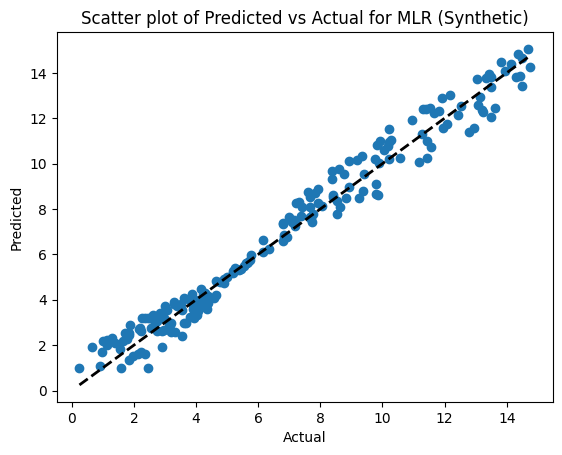

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

def load_and_preprocess_dataset(filepath):
    dataset = pd.read_csv(filepath, sep='\t', header=0)
    X = dataset.iloc[:, :-1].values  
    y = dataset.iloc[:, -1].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

X, y = load_and_preprocess_dataset('../Data//A1-synthetic.txt')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5)
cv_errors = []

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')

    y_val_pred = model.predict(X_val_cv)
    error = mean_absolute_percentage_error(y_val_cv, y_val_pred)
    cv_errors.append(error)

    print(f'Cross-Validation MAPE for this fold: {error * 100:.2f}%')

average_cv_error = np.mean(cv_errors)
print(f'Average Cross-Validation MAPE: {average_cv_error * 100:.2f}%')

model_final = LinearRegression()
model_final.fit(X_train, y_train)

print(f'Final Model Coefficients: {model_final.coef_}')
print(f'Final Model Intercept: {model_final.intercept_}')

y_pred_test = model_final.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test MAPE: {test_mape * 100:.2f}%')

plt.scatter(y_test, y_pred_test)
plt.title('Scatter plot of Predicted vs Actual for MLR (Synthetic)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()
